In [8]:
from sklearn import ensemble, feature_selection, model_selection
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# 嵌入法是一种让算法自己决定使用哪些特征的方法，即特征的选择和算法训练同时进行
data = pd.read_csv('./data/digit recognizor.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [7]:
rfc = ensemble.RandomForestClassifier(n_estimators=10, random_state=30)
# 在这里我只想提取出来有限的特征。0.005这个阈值对于有780个特征的数据来说，已经是非常高的阈值
# 因为平均每个特征只能够分到大约0.001的feature_importance_
X_embedded = feature_selection.SelectFromModel(rfc, threshold=0.005).fit_transform(X, y)
X_embedded.shape


(42000, 50)

In [10]:
rfc.fit(X, y).feature_importances_


array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.82235917e-05, 1.03734641e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.73043314e-06, 1.51590379e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

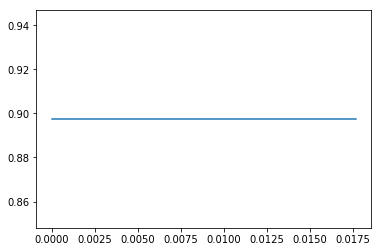

In [17]:
# 我们使用学习曲线来确定最佳的阈值
rfc = ensemble.RandomForestClassifier(n_estimators=10, random_state=66, n_jobs=-1)
threshold = np.linspace(0, (rfc.fit(X, y).feature_importances_).max(), 20)
scores = []
for i in threshold:
    X_embeded = feature_selection.SelectFromModel(rfc, threshold=i).fit_transform(X, y)
    score_mean = model_selection.cross_val_score(rfc, X_embedded, y, cv=5).mean()
    scores.append(score_mean)
plt.plot(threshold, scores)
plt.show()